In [34]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sqlalchemy import create_engine
# import warnings

# warnings.filterwarnings('ignore')

In [35]:
postgres_user = 'dsbc_student'
postgres_pw = '7*.8G9QH21'
postgres_host = '142.93.121.174'
postgres_port = '5432'
postgres_db = 'diabetes'
table_name = 'diabetes'
engine = create_engine('postgresql://{}:{}@{}:{}/{}'.format(
    postgres_user, postgres_pw, postgres_host, postgres_port, postgres_db))

diabetes_df = pd.read_sql_query('select * from diabetes',con=engine)

# no need for an open connection, 
# as we're only doing a single query
engine.dispose()

In [36]:
diabetes_df.head()

,pregnancies,glucose,blood_pressure,skin_thickness,insulin,bmi,diabetes_pedigree,age,outcome
0,5,44,62,0,0,25.0,0.587,36,0
1,2,56,56,28,45,24.2,0.332,22,0
2,9,57,80,37,0,32.8,0.096,41,0
3,0,57,60,0,0,21.7,0.735,67,0
4,3,61,82,28,0,34.4,0.243,46,0


In [37]:
diabetes_df.shape

(763, 9)

In [38]:
diabetes_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 763 entries, 0 to 762
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   pregnancies        763 non-null    int64  
 1   glucose            763 non-null    int64  
 2   blood_pressure     763 non-null    int64  
 3   skin_thickness     763 non-null    int64  
 4   insulin            763 non-null    int64  
 5   bmi                763 non-null    float64
 6   diabetes_pedigree  763 non-null    float64
 7   age                763 non-null    int64  
 8   outcome            763 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 53.8 KB


In [39]:
diabetes_df.describe()

,pregnancies,glucose,blood_pressure,skin_thickness,insulin,bmi,diabetes_pedigree,age,outcome
count,763.000000,763.000000,763.000000,763.000000,763.000000,763.000000,763.000000,763.000000,763.000000
mean,3.851900,121.686763,69.115334,20.477064,80.292267,31.986763,0.472477,33.271298,0.348624
std,3.374729,30.535641,19.399240,15.973171,115.457448,7.893221,0.331963,11.772161,0.476847
min,0.000000,44.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243500,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,36.000000,32.000000,0.374000,29.000000,0.000000
75%,6.000000,141.000000,80.000000,32.000000,128.500000,36.550000,0.626500,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [40]:
# Checking Missing Values
pd.DataFrame(diabetes_df.isnull().sum())

,0
pregnancies,0
glucose,0
blood_pressure,0
skin_thickness,0
insulin,0
bmi,0
diabetes_pedigree,0
age,0
outcome,0


In [41]:
# Checking Duplicate  values
diabetes_df[diabetes_df.duplicated()]

,pregnancies,glucose,blood_pressure,skin_thickness,insulin,bmi,diabetes_pedigree,age,outcome


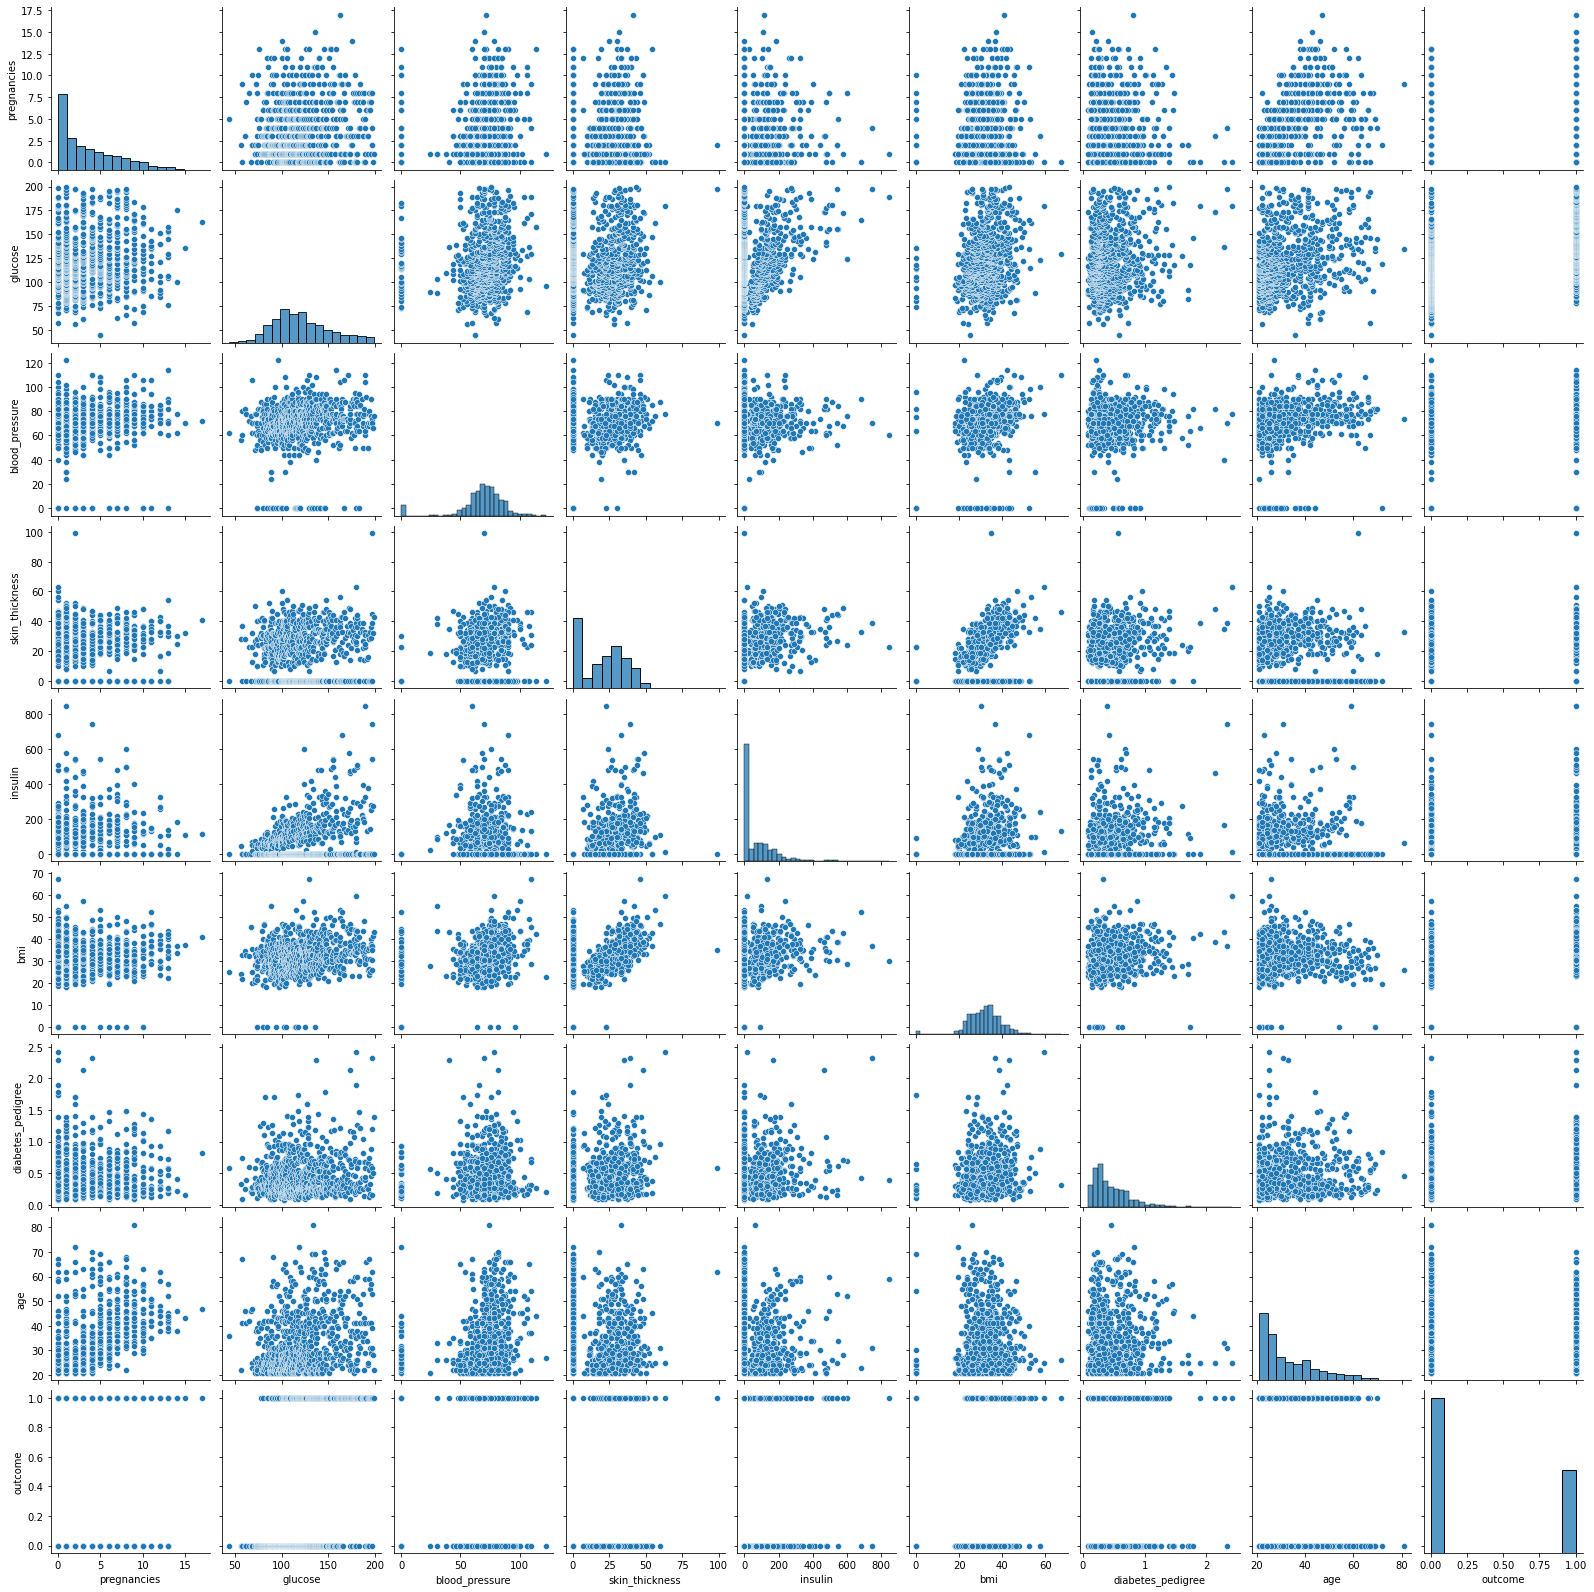

In [42]:
sns.pairplot(diabetes_df)
plt.show()

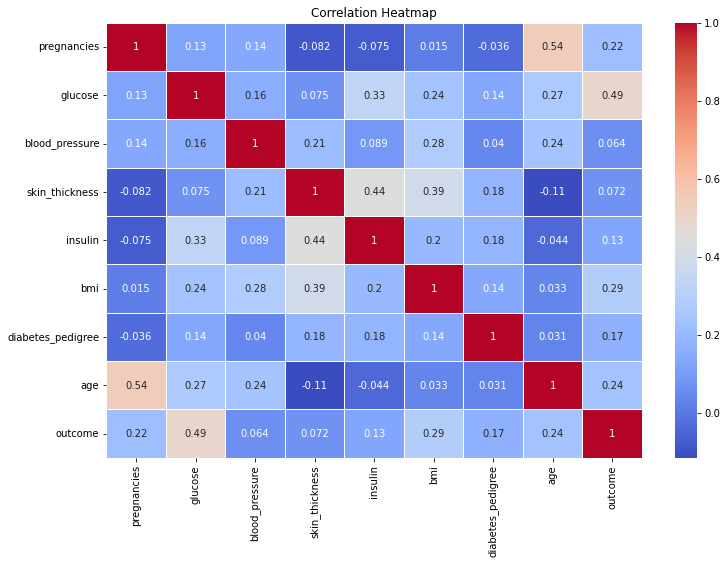

In [43]:
cor_matrix = diabetes_df.corr()
plt.figure(figsize = (12,8))
sns.heatmap(cor_matrix, annot = True, cmap = 'coolwarm', linewidths = 0.5)
plt.title('Correlation Heatmap')
plt.show()

In [47]:
# Checking Unique values

variables = ['pregnancies','glucose', 'blood_pressure', 'skin_thickness', 'insulin','bmi','diabetes_pedigree','age','outcome']
for i in variables:
    print(diabetes_df[i].unique())

[ 5  2  9  0  3  7  8 10  1  4 13  6 12 11 14 15 17]
[ 44  56  57  61  62  65  67  68  71  72  73  74  75  76  77  78  79  80
  81  82  83  84  85  86  87  88  89  90  91  92  93  94  95  96  97  98
  99 100 101 102 103 104 105 106 107 108 109 110 111 112 113 114 115 116
 117 118 119 120 121 122 123 124 125 126 127 128 129 130 131 132 133 134
 135 136 137 138 139 140 141 142 143 144 145 146 147 148 149 150 151 152
 153 154 155 156 157 158 159 160 161 162 163 164 165 166 167 168 169 170
 171 172 173 174 175 176 177 178 179 180 181 182 183 184 186 187 188 189
 190 191 193 194 195 196 197 198 199]
[ 62  56  80  60  82  78  72  76  70 106  48  50   0  68  52  64  88  75
  55  66  74  86  58  65  90  30  24  85  54  92 100 122  84  44 108  38
  94  98  96  46 110 102  40  61 114 104  95]
[ 0 28 37 23 32 13 27 18 50 25 10 40 24 41 30 29 42 11 31 36 22 16 15 26
 19 20 52 34 21 17 14 12  8 47  7 39 33 45 38 60 35 48 46 54 43 44 51 49
 56 63 99]
[  0  45  66  15  49  76  36  55  42  56  88  40 

In the dataset variables except for pregnancies and outcome cannot have value as 0, because it is not possible to have 0 glucose level, 0 skin thickness or 0 blood pressure. So this will be considered as incorrect information.

In [55]:
# Checking the count of value 0 in the variables
variables = ['glucose', 'blood_pressure', 'skin_thickness', 'insulin','bmi','diabetes_pedigree','age']

for i in variables:
    c = 0
    for x in (diabetes_df[i]):
        if x == 0:
            c = c+1
    print(i,c)    

glucose 0
blood_pressure 35
skin_thickness 227
insulin 370
bmi 11
diabetes_pedigree 0
age 0


In [58]:
# Now replacing the missing values with the mean
variables = ['blood_pressure', 'skin_thickness', 'insulin','bmi']
for i in variables:
    diabetes_df[i] = diabetes_df[i].replace(0, diabetes_df[i].mean())

In [59]:
# Checking to ensure that the incorrect or missing values have been replaced
variables = ['blood_pressure', 'skin_thickness', 'insulin','bmi']
for i in variables:
    c = 0
    for x in diabetes_df[i]:
        if x==0:
            c= c+1
    print(i,c)

blood_pressure 0
skin_thickness 0
insulin 0
bmi 0


In [61]:
diabetes_df.head()

,pregnancies,glucose,blood_pressure,skin_thickness,insulin,bmi,diabetes_pedigree,age,outcome
0,5,44,62.0,20.477064,80.292267,25.0,0.587,36,0
1,2,56,56.0,28.000000,45.000000,24.2,0.332,22,0
2,9,57,80.0,37.000000,80.292267,32.8,0.096,41,0
3,0,57,60.0,20.477064,80.292267,21.7,0.735,67,0
4,3,61,82.0,28.000000,80.292267,34.4,0.243,46,0


Exploratory Data Analysis:

In the exploratory data analysis, I will be looking at the distribution of the data, the correlation between the features, and the relationship between the features and the target variable. I will start by looking at the distribution of the data, followed by relationship between the target variable and independent variables.

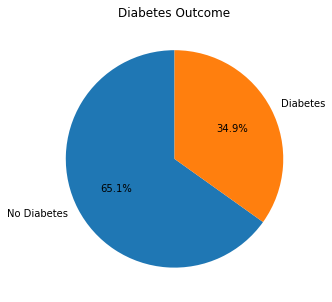

In [66]:
plt.figure(figsize = (5,5))
plt.pie(diabetes_df['outcome'].value_counts(),labels = ['No Diabetes', 'Diabetes'],autopct ='%1.1f%%', shadow = False, startangle = 90)
plt.title('Diabetes Outcome')
plt.show()

<AxesSubplot:xlabel='outcome', ylabel='age'>

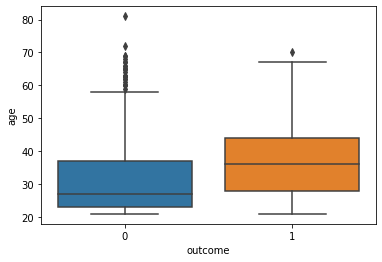

In [70]:
# Age distribution and diabetes
sns.boxplot(x = 'outcome', y= 'age', data = diabetes_df)

We see that age has an impact on diabetes. People with a higher age have a greater chance of diabetes.
Especially people with diabetes have an average of around 35 years.

<AxesSubplot:xlabel='outcome', ylabel='pregnancies'>

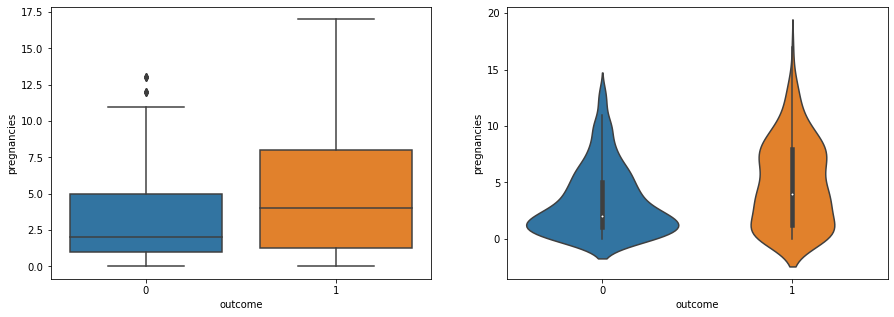

In [72]:
# Pregnancy and diabetes

plt.figure(figsize = (15,5))
plt.subplot(1,2,1)
sns.boxplot(x = 'outcome', y='pregnancies', data = diabetes_df)

plt.subplot(1,2,2)
sns.violinplot( x = 'outcome', y = 'pregnancies', data = diabetes_df)

According to the plots,the increased number of pregnancies highlights increased risk of diabetes.

<AxesSubplot:title={'center':'Glucose vs Diabetes'}, xlabel='outcome', ylabel='glucose'>

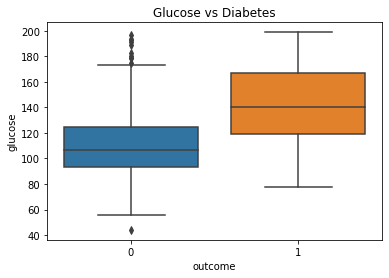

In [73]:
plt.title('Glucose vs Diabetes')
sns.boxplot(x = 'outcome', y ='glucose', data = diabetes_df)

We see that glucose plays a major role in determining whether a person is diabetic or not. Patients with median glucose level less than 120 are more likely to be non-diabetic. The patients with median glucose level greater than 140 are more likely to be diabetic. Therefore high glucose levels is a good indicator of diabetes.

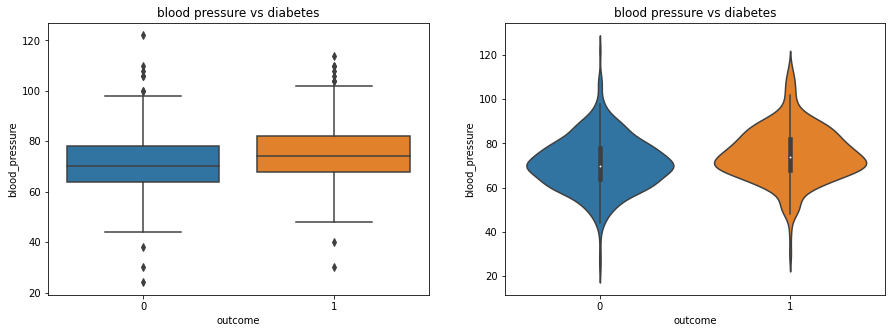

In [85]:
# Blood Pressure and Diabetes
plt.figure(figsize = (15,5))

plt.subplot(1,2,1)
plt.title('blood pressure vs diabetes')
sns.boxplot(x = 'outcome', y='blood_pressure',data = diabetes_df)

plt.subplot(1,2,2)
plt.title('blood pressure vs diabetes')
sns.violinplot(x = 'outcome', y='blood_pressure',data = diabetes_df)

plt.show()

Both the boxplot and voilinplot provides clear understanding of the relation between the blood pressure and diabetes. The boxplot shows that the median of the blood pressure for the diabetic patients is slightly higher than the non-diabetic patients. The voilinplot shows that the distribution of the blood pressure for the diabetic patients is slightly higher than the non-diabetic patients. But there has been not enough evidence to conclude that the blood pressure is a good predictor of diabetes

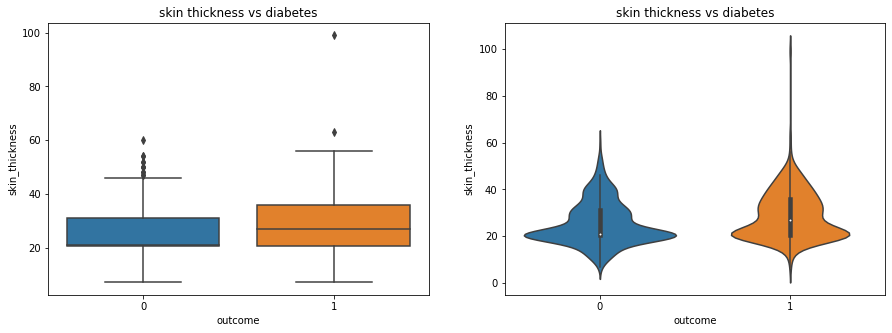

In [87]:
# Skin thickness and diabetes
plt.figure(figsize = (15,5))

plt.subplot(1,2,1)
plt.title('skin thickness vs diabetes')
sns.boxplot(x = 'outcome', y='skin_thickness',data = diabetes_df)

plt.subplot(1,2,2)
plt.title('skin thickness vs diabetes')
sns.violinplot(x = 'outcome', y='skin_thickness',data = diabetes_df)

plt.show()

Here both the boxplot and violinplot reveals the effect of diabetes on skin thickness. As obserevd in the boxplot, the median of skin thickness is higher for the diabetic patients than the non-diabetic patients, where non diabetic patients have median skin thickness near 20 in comparison to skin thickness nearly 30 in diabetic patients. The voilinpplot shows the distribution of patients' skin thickness amoung the patients, where the non diabetic ones have greater distribution near 20 and diabetic much less distribution near 20 and increased distribution near 30. Therefore, skin thickness can be a indicator of diabetes.

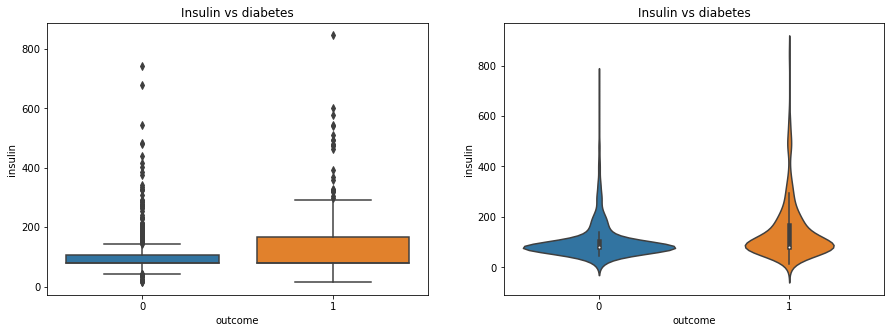

In [88]:
# Insulin and Diabetes
plt.figure(figsize = (15,5))

plt.subplot(1,2,1)
plt.title('Insulin vs diabetes')
sns.boxplot(x = 'outcome', y='insulin',data = diabetes_df)

plt.subplot(1,2,2)
plt.title('Insulin vs diabetes')
sns.violinplot(x = 'outcome', y='insulin',data = diabetes_df)

plt.show()

Insulin is a major body hormone that regulates glucose metabolism. Insulin is required for the body to efficiently use sugars, fats and proteins. Any change in insulin amount in the body would result in change glucose levels as well. Here the boxplot and violinplot shows the distribution of insulin level in patients. In non diabetic patients the insulin level is near to 100, whereas in diabetic patients the insulin level is near to 200. In the voilinplot we can see that the distribution of insulin level in non diabetic patients is more spread out near 100, whereas in diabetic patients the distribution is contracted and shows a little bit spread in higher insulin levels. This shows that the insulin level is a good indicator of diabetes.

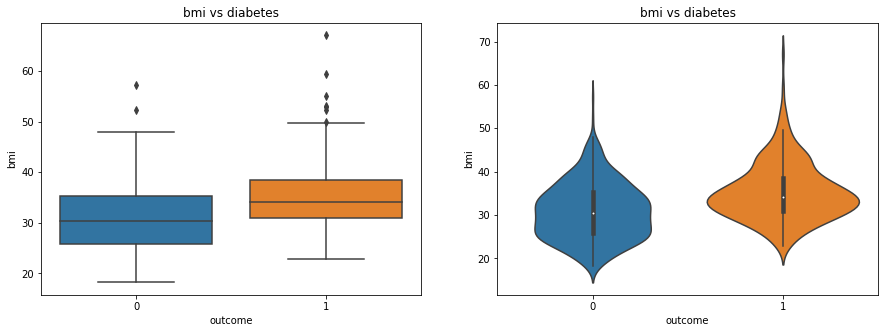

In [89]:
# BMI and diabetes
# Insulin and Diabetes
plt.figure(figsize = (15,5))

plt.subplot(1,2,1)
plt.title('bmi vs diabetes')
sns.boxplot(x = 'outcome', y='bmi',data = diabetes_df)

plt.subplot(1,2,2)
plt.title('bmi vs diabetes')
sns.violinplot(x = 'outcome', y='bmi',data = diabetes_df)

plt.show()

In [ ]:
Both graphs highlights the role of BMI in diabetes prediction. Non diabetic patients have a normal BMI within the range of 25-35 whereas the diabetic patients have a BMI greater than 35. The violinplot reveals the BMI distribution, where the non dibetic patients have a increased spread from 25 to 35 with narrows after 35. However in diabetic patients there is increased spread at 35 and increased spread 45-50 as compared to non diabetic patients.Therefore BMI is a good predictor of diabetes and obese people are more likely to be diabetic.

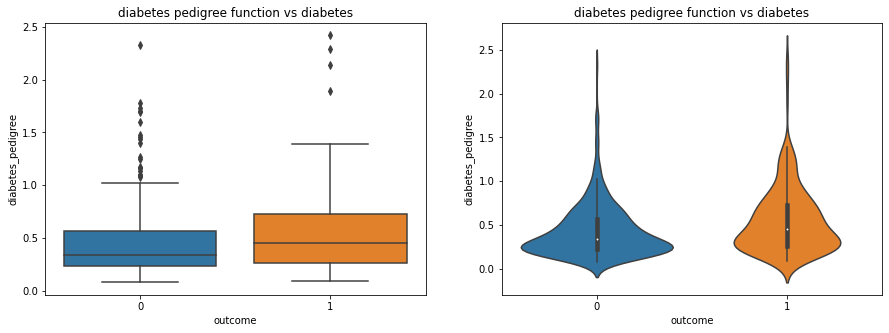

In [91]:
# Diabetes pedigree function
plt.figure(figsize = (15,5))

plt.subplot(1,2,1)
plt.title('diabetes pedigree function vs diabetes')
sns.boxplot(x = 'outcome', y='diabetes_pedigree',data = diabetes_df)

plt.subplot(1,2,2)
plt.title('diabetes pedigree function vs diabetes')
sns.violinplot(x = 'outcome', y='diabetes_pedigree',data = diabetes_df)

plt.show()

Diabetes Pedigree Function (DPF) calculates diabetes likelihood depending on the subject's age and his/her diabetic family history. From the boxplot, the patients with lower DPF, are much less likely to have diabetes. The patients with higher DPF, are much more likely to have diabetes. In the violinplot, majority of the non diabetic patients have a DPF of 0.25-0.35, whereas the diabetic patients have a increased DPF, which is shown by the their distribution in the violinplot where there is a increased spread in the DPF from 0.5 -1.5. Therefore the DPF is a good indicator of diabetes.

In [93]:
# Train Test Split
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(diabetes_df.drop('outcome',axis =1),diabetes_df['outcome'],test_size = 0.2,random_state =42)

For predicting Diabetes, I'll be using the following algorithms:
1. Logistic Regression
2. Random Forest Classifier
3. Support Vector Machine

In [95]:
# Model building
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr

LogisticRegression()

In [96]:
# Training the model
lr.fit(X_train,y_train)
# Training Accuracy
lr.score(X_train,y_train)

C:\Anaconda\chowd\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.7540983606557377

In [97]:
# predicted outcomes
lr_pred = lr.predict(X_test)

In [99]:
# Random Forest Classifier
# Building Model
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=100,random_state=42)
rfc

RandomForestClassifier(random_state=42)

In [100]:
# training model
rfc.fit(X_train,y_train)
# training accuracy
rfc.score(X_train,y_train)

1.0

In [101]:
# predicted outcomes
rfc_pred = rfc.predict(X_test)

In [102]:
# Support Vector Machine
# Model building
from sklearn.svm import SVC
svm = SVC(kernel = 'linear', random_state =0)
svm

SVC(kernel='linear', random_state=0)

In [103]:
# Training the model
svm.fit(X_train,y_train)
# training accuracy
svm.score(X_test,y_test)

0.7843137254901961

In [104]:
# predicting outcomes
svm_pred = svm.predict(X_test)

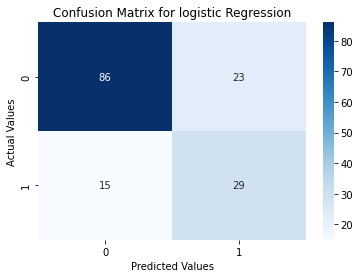

In [105]:
# Model Evaluation

# Evaluating Logistic Regression Model
from sklearn.metrics import confusion_matrix
sns.heatmap(confusion_matrix(y_test,lr_pred), annot = True, cmap ='Blues')
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')
plt.title('Confusion Matrix for logistic Regression')
plt.show()

C:\Anaconda\chowd\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\Anaconda\chowd\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


Text(0, 0.5, 'count')

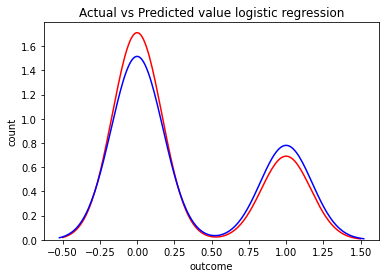

In [106]:
 # Distribution Plot
sns.distplot(y_test,color = 'r', label = 'Actual Value', hist = False)
sns.distplot(lr_pred, color = 'b',label = 'Predicted value', hist = False)
plt.title('Actual vs Predicted value logistic regression')
plt.xlabel('outcome')
plt.ylabel('count')

These distribution plot clearly visualizes the accuracy of the model. The red color represents the actual values and the blue color represents the predicted values. The more the overlapping of the two colors, the more accurate the model is.

In [107]:
# Classification Report

from sklearn.metrics import classification_report
print(classification_report(y_test, lr_pred))

              precision    recall  f1-score   support

           0       0.85      0.79      0.82       109
           1       0.56      0.66      0.60        44

    accuracy                           0.75       153
   macro avg       0.70      0.72      0.71       153
weighted avg       0.77      0.75      0.76       153



The model has an average f1 score of 0.71 and accuracy of 75%.

In [108]:
from sklearn.metrics import accuracy_score,mean_absolute_error,mean_squared_error,r2_score
print('Accuracy Score:', accuracy_score(y_test,lr_pred))
print('Mean Absolute Error:',mean_absolute_error(y_test,lr_pred))
print('Mean Squared Error:', mean_squared_error(y_test,lr_pred))
print('R2 Score:', r2_score(y_test,lr_pred))

Accuracy Score: 0.7516339869281046
Mean Absolute Error: 0.24836601307189543
Mean Squared Error: 0.24836601307189543
R2 Score: -0.21226021684737306


In [ ]:
# Evaluating random forest classifier
# Confusion matrix heatmap
sns.heatmap(confusion_matrix(y_test,rfc_pred), annot =True, cmap= 'Blues')
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')
plt.title('Confusion Matrix for logistic Regression')
plt.show()

The diagonal boxes shows the count of true positives for each class. The predicted value is given on top while the actual value is given on the left side. The off-diagonal boxes shows the count of false positives.

C:\Anaconda\chowd\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\Anaconda\chowd\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


Text(0, 0.5, 'count')

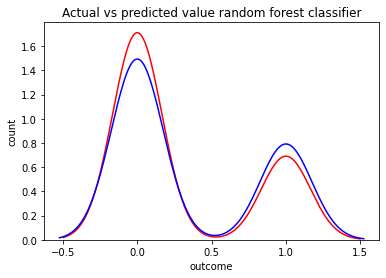

In [111]:
# Distribution Plot
sns.distplot(y_test, color ='r', label = 'Actual Value', hist = False)
sns.distplot(rfc_pred, color ='b',label = 'Predicted Value',hist = False)
plt.title('Actual vs predicted value random forest classifier')
plt.xlabel('outcome')
plt.ylabel('count')

These distribution plot clearly visualizes the accuracy of the model. The red color represents the actual values and the blue color represents the predicted values. The more the overlapping of the two colors, the more accurate the model is.

In [112]:
# Classification report
print(classification_report(y_test,rfc_pred))

              precision    recall  f1-score   support

           0       0.84      0.77      0.80       109
           1       0.53      0.64      0.58        44

    accuracy                           0.73       153
   macro avg       0.68      0.70      0.69       153
weighted avg       0.75      0.73      0.74       153



The model has an average f1 score of 0.69 and accuracy of 73% which is less in comparison
to logistic regression model.

In [113]:
print('Accuracy Score: ',accuracy_score(y_test,rfc_pred))
print('Mean Absolute Error: ',mean_absolute_error(y_test,rfc_pred))
print('Mean Squared Error: ',mean_squared_error(y_test,rfc_pred))
print('R2 Score: ',r2_score(y_test,rfc_pred))

Accuracy Score:  0.7320261437908496
Mean Absolute Error:  0.2679738562091503
Mean Squared Error:  0.2679738562091503
R2 Score:  -0.30796497080900775


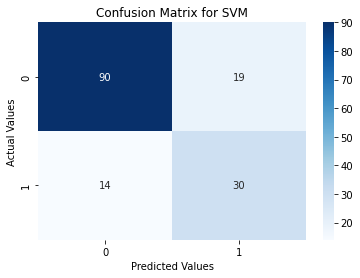

In [115]:
# Evaluating SVM Model
# Confusion Matrix Heatmap
from sklearn.metrics import confusion_matrix
sns.heatmap(confusion_matrix(y_test,svm_pred), annot = True, cmap ='Blues')
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')
plt.title('Confusion Matrix for SVM')
plt.show()

C:\Anaconda\chowd\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\Anaconda\chowd\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


Text(0, 0.5, 'count')

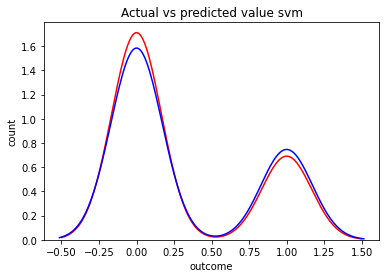

In [116]:
# Distribution plot
sns.distplot(y_test, color ='r', label = 'Actual Value', hist = False)
sns.distplot(svm_pred, color ='b',label = 'Predicted Value',hist = False)
plt.title('Actual vs predicted value svm')
plt.xlabel('outcome')
plt.ylabel('count')

In [117]:
# Classification report
print(classification_report(y_test,svm_pred))

              precision    recall  f1-score   support

           0       0.87      0.83      0.85       109
           1       0.61      0.68      0.65        44

    accuracy                           0.78       153
   macro avg       0.74      0.75      0.75       153
weighted avg       0.79      0.78      0.79       153



The model has an avg. f1 score of 0.75 and accuracy of 78%.

In [118]:
print('Accuracy Score: ',accuracy_score(y_test,svm_pred))
print('Mean Absolute Error: ',mean_absolute_error(y_test,svm_pred))
print('Mean Squared Error: ',mean_squared_error(y_test,svm_pred))
print('R2 Score: ',r2_score(y_test,svm_pred))

Accuracy Score:  0.7843137254901961
Mean Absolute Error:  0.21568627450980393
Mean Squared Error:  0.21568627450980393
R2 Score:  -0.052752293577981835


Text(0.5, 1.0, 'Comparison of different models')

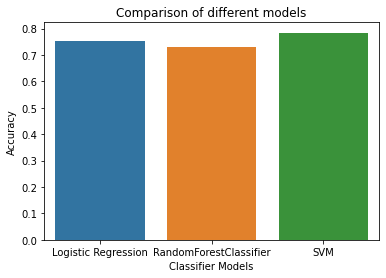

In [119]:
# Comparing accuracy of the models
sns.barplot(x=['Logistic Regression','RandomForestClassifier','SVM'], y =[0.7516339869281046,0.7320261437908496,0.7843137254901961])
plt.xlabel('Classifier Models')
plt.ylabel('Accuracy')
plt.title('Comparison of different models')

Conclusion:


From the exploratory data analysis, I have concluded that the risk of diabetes depends upon the following factors:

    Glucose level
    Number of pregnancies
    Skin Thickness
    Insulin level
    BMI

With in increase in Glucose level, insulin level, BMI and number of pregnancies, the risk of diabetes increases. However, the number of pregnancies have strange effect of risk of diabetes which couldn't be explained by the data. The risk of diabetes also increases with increase in skin thickness.

Coming to the classification models, SVM  outperformed Random Forest and Logistic Regressionwith 78% accuracy. The accuracy of the model can be improved by increasing the size of the dataset. The dataset used for this project was very small and had only 768 rows.